In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KernelDensity
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
X = pd.read_csv('train_features.csv', sep=",")
X.head(10)

X.info()
X=X.drop(['match_id_hash'],axis=1)
X.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39675 entries, 0 to 39674
Columns: 246 entries, match_id_hash to d5_sen_placed
dtypes: float64(30), int64(215), object(1)
memory usage: 74.5+ MB


,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,r1_max_mana,r1_level,r1_x,r1_y,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed,r2_hero_id,r2_kills,r2_deaths,r2_assists,r2_denies,r2_gold,r2_lh,r2_xp,r2_health,r2_max_health,r2_max_mana,...,d4_health,d4_max_health,d4_max_mana,d4_level,d4_x,d4_y,d4_stuns,d4_creeps_stacked,d4_camps_stacked,d4_rune_pickups,d4_firstblood_claimed,d4_teamfight_participation,d4_towers_killed,d4_roshans_killed,d4_obs_placed,d4_sen_placed,d5_hero_id,d5_kills,d5_deaths,d5_assists,d5_denies,d5_gold,d5_lh,d5_xp,d5_health,d5_max_health,d5_max_mana,d5_level,d5_x,d5_y,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
0,155,22,7,1,11,11,0,0,0,0,543,7,533,358,600,350.93784,2,116,122,0.000000,0,0,1,0,0.000000,0,0,0,0,78,0,0,0,3,399,4,478,636,720,254.93774,...,760,760,326.93780,2,90,150,0.000000,0,0,2,1,1.000000,0,0,1,0,34,0,0,0,0,851,11,870,593,680,566.93805,3,128,128,0.000000,0,0,0,0,0.000000,0,0,0,0
1,658,4,0,3,10,15,7,2,0,7,5257,52,3937,1160,1160,566.93805,8,76,78,0.000000,0,0,0,0,0.437500,0,0,0,0,96,3,1,2,3,3394,19,3897,1352,1380,386.93787,...,567,1160,410.93790,6,124,142,0.000000,0,0,6,0,0.500000,0,0,0,0,92,0,2,0,1,1423,8,1136,800,800,446.93793,4,180,176,0.000000,0,0,0,0,0.000000,0,0,0,0
2,21,23,0,0,0,101,0,0,0,0,176,0,0,680,680,506.93800,1,118,118,0.000000,0,0,0,0,0.000000,0,0,0,0,51,0,0,0,0,176,0,0,720,720,278.93777,...,600,600,302.93777,1,176,110,0.000000,0,0,0,0,0.000000,0,0,0,0,17,0,0,0,0,96,0,0,640,640,446.93793,1,162,162,0.000000,0,0,0,0,0.000000,0,0,0,0
3,576,22,7,1,4,14,1,0,3,1,1613,0,1471,900,900,290.93777,4,170,96,2.366089,0,0,5,0,0.571429,0,0,0,0,99,1,0,1,2,2816,30,3602,878,1100,494.93796,...,1160,1160,386.93787,4,176,100,4.998863,0,0,2,0,0.000000,0,0,0,0,86,0,1,0,1,1333,2,1878,630,740,518.93800,5,82,160,8.664527,3,1,3,0,0.000000,0,0,2,0
4,453,22,7,1,3,42,0,1,1,0,1404,9,1351,1000,1000,338.93784,4,80,164,9.930903,0,0,4,0,0.500000,0,0,0,0,69,1,0,0,0,1840,14,1693,868,1000,350.93784,...,680,680,374.93787,4,176,108,13.596678,0,0,2,0,0.500000,0,0,0,0,1,0,1,1,8,2199,32,1919,692,740,302.93777,5,104,162,0.000000,2,1,2,0,0.250000,0,0,0,0
5,160,22,7,0,0,57,0,0,0,1,403,0,359,740,740,290.93777,2,92,148,0.000000,0,0,1,0,0.000000,0,0,0,0,10,0,0,0,1,541,3,1045,685,720,290.93777,...,491,740,374.93787,2,184,100,0.000000,0,0,0,0,0.000000,0,0,0,0,8,0,0,0,0,417,9,275,218,680,278.93777,2,182,174,0.000000,0,0,0,0,0.000000,0,0,0,0
6,1016,22,0,1,0,119,0,3,3,5,3085,1,2828,495,740,816.93830,6,112,112,21.451569,0,0,18,0,0.300000,0,0,5,2,71,2,5,6,2,2985,6,3231,1140,1140,386.93787,...,1016,1240,542.93800,10,136,154,0.000000,0,0,1,0,0.500000,0,0,0,0,90,0,1,3,8,2761,9,3632,734,800,626.93810,8,92,172,8.264696,0,0,3,0,0.250000,0,0,3,0
7,582,22,7,2,2,12,3,1,2,9,3516,40,3964,495,960,530.93800,8,120,118,0.000000,0,0,2,0,0.833333,0,0,0,0,49,0,6,3,6,1972,18,2238,980,980,350.93784,...,787,800,554.93805,7,176,90,17.395752,0,0,4,0,0.200000,0,0,1,1,68,2,2,3,0,1707,2,754,620,620,434.93793,3,126,126,15.762911,3,1,0,1,0.500000,0,0,3,0
8,636,22,7,1,5,74,1,1,0,3,3041,35,4316,923,940,698.93820,9,114,114,1.299609,3,1,0,0,0.333333,0,0,1,0,14,1,2,2,1,1615,0,1620,940,940,290.93777,...,594,1060,530.93800,9,96,158,1.699567,6,1,4,0,0.285714,0,0,0,0,76,3,1,0,16,4795,72,5671,1143,1200,1336.93870,10,118,122,8.064697,0,0,1,0,0.428571,0,0,1,0
9,1054,22,0,8,5,71,1,3,10,4,3627,12,3715,1400,1400,422.93790,8,154,102,44.455677,0,0,4,0,0.785714,0,0,0,0,84,4,1,4,6,4918,23,5011,1260,1260,744.93823,...,1000,1000,398.93787,10,114,156,20.428410,0,0,1,0,0.818182,0,0,0,0,17,1,2,6,7,6596,79,6475,1000,1000,1118.93860,11,182,176,2.899237,0,0,11,0,0.636364,0,0,0,0


In [ ]:
for i in X.columns:
    X[i] = X[i].astype(int)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39675 entries, 0 to 39674
Columns: 245 entries, game_time to d5_sen_placed
dtypes: int64(245)
memory usage: 74.2 MB


In [ ]:
X.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,r1_max_mana,r1_level,r1_x,r1_y,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed,r2_hero_id,r2_kills,r2_deaths,r2_assists,r2_denies,r2_gold,r2_lh,r2_xp,r2_health,r2_max_health,r2_max_mana,...,d4_health,d4_max_health,d4_max_mana,d4_level,d4_x,d4_y,d4_stuns,d4_creeps_stacked,d4_camps_stacked,d4_rune_pickups,d4_firstblood_claimed,d4_teamfight_participation,d4_towers_killed,d4_roshans_killed,d4_obs_placed,d4_sen_placed,d5_hero_id,d5_kills,d5_deaths,d5_assists,d5_denies,d5_gold,d5_lh,d5_xp,d5_health,d5_max_health,d5_max_mana,d5_level,d5_x,d5_y,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
0,155,22,7,1,11,11,0,0,0,0,543,7,533,358,600,350,2,116,122,0,0,0,1,0,0,0,0,0,0,78,0,0,0,3,399,4,478,636,720,254,...,760,760,326,2,90,150,0,0,0,2,1,1,0,0,1,0,34,0,0,0,0,851,11,870,593,680,566,3,128,128,0,0,0,0,0,0,0,0,0,0
1,658,4,0,3,10,15,7,2,0,7,5257,52,3937,1160,1160,566,8,76,78,0,0,0,0,0,0,0,0,0,0,96,3,1,2,3,3394,19,3897,1352,1380,386,...,567,1160,410,6,124,142,0,0,0,6,0,0,0,0,0,0,92,0,2,0,1,1423,8,1136,800,800,446,4,180,176,0,0,0,0,0,0,0,0,0,0
2,21,23,0,0,0,101,0,0,0,0,176,0,0,680,680,506,1,118,118,0,0,0,0,0,0,0,0,0,0,51,0,0,0,0,176,0,0,720,720,278,...,600,600,302,1,176,110,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,96,0,0,640,640,446,1,162,162,0,0,0,0,0,0,0,0,0,0
3,576,22,7,1,4,14,1,0,3,1,1613,0,1471,900,900,290,4,170,96,2,0,0,5,0,0,0,0,0,0,99,1,0,1,2,2816,30,3602,878,1100,494,...,1160,1160,386,4,176,100,4,0,0,2,0,0,0,0,0,0,86,0,1,0,1,1333,2,1878,630,740,518,5,82,160,8,3,1,3,0,0,0,0,2,0
4,453,22,7,1,3,42,0,1,1,0,1404,9,1351,1000,1000,338,4,80,164,9,0,0,4,0,0,0,0,0,0,69,1,0,0,0,1840,14,1693,868,1000,350,...,680,680,374,4,176,108,13,0,0,2,0,0,0,0,0,0,1,0,1,1,8,2199,32,1919,692,740,302,5,104,162,0,2,1,2,0,0,0,0,0,0


In [ ]:
Y = pd.read_csv('train_targets.csv', sep=",")
Y.head(10)

,match_id_hash,game_time,radiant_win,duration,time_remaining,next_roshan_team
0,a400b8f29dece5f4d266f49f1ae2e98a,155,False,992,837,NaN
1,b9c57c450ce74a2af79c9ce96fac144d,658,True,1154,496,NaN
2,6db558535151ea18ca70a6892197db41,21,True,1503,1482,Radiant
3,46a0ddce8f7ed2a8d9bd5edcbb925682,576,True,1952,1376,NaN
4,b1b35ff97723d9b7ade1c9c3cf48f770,453,False,2001,1548,NaN
5,19c39fe2af2b547e48708ca005c6ae74,160,False,2063,1903,NaN
6,c96d629dc0c39f0c616d1949938a6ba6,1016,True,2147,1131,Radiant
7,156c88bff4e9c4668b0f53df3d870f1b,582,False,1927,1345,Dire
8,df50f738c454d430a33b2bf90cb9ef1a,636,False,2059,1423,NaN
9,7469e9440ea3d19b211a484647c7126e,1054,False,2287,1233,NaN


In [ ]:
Y=Y.drop(['match_id_hash'],axis=1)
Y=Y.drop(['game_time'],axis=1)
Y=Y.drop(['duration'],axis=1)
Y=Y.drop(['time_remaining'],axis=1)
Y=Y.drop(['next_roshan_team'],axis=1)

In [ ]:
Y["radiant_win"] = Y["radiant_win"].astype(int)

In [ ]:
Y.head()

print(len(Y))
print(len(X))

print(X.shape)
Y.shape
Y.head()

39675
39675
(39675, 245)


,radiant_win
0,0
1,1
2,1
3,1
4,0


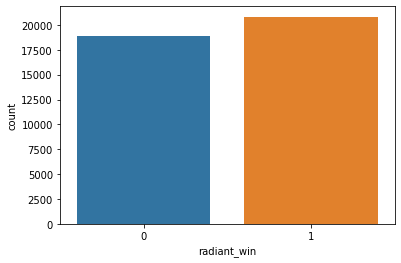

In [ ]:
sns.countplot(x=Y['radiant_win'],data=Y)

In [ ]:
#Usando GridSearchCV
Y = Y['radiant_win'].values
X = X.values
print(X.shape)
print(Y.shape)


def modeloAEntrenar(modelo,parametros,X,Y):
    kfoldEstratificado = StratifiedKFold(n_splits=10)
    resultadoModelo = GridSearchCV(modelo, cv=kfoldEstratificado, param_grid=parametros, return_train_score=True, n_jobs=-1)
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, shuffle=True)
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    class_weightsTrain = class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)
    resultadoModelo.fit(X_train, Y_train)
    print("Mejores Parametros:",resultadoModelo.best_params_)
    return resultadoModelo,X_test,Y_test

(39675, 245)
(39675,)


In [ ]:
knn = KNeighborsClassifier()
params = {
    'n_neighbors':[5,10,20,40,80,120]
}
KNN,X_test,Y_test = modeloAEntrenar(knn,params,X,Y)

Mejores Parametros: {'n_neighbors': 120}


In [ ]:
#Guardar el modelo
joblib.dump(KNN,'Modelos/KNN.pkl')
#Cargar Modelo
#nombre_modelo = 'Modelos/KNN.pkl'
#KNN = joblib.load(nombre_modelo)

['Modelos/KNN.pkl']

In [ ]:
predict = KNN.predict(X_test)
acc_KNN = accuracy_score(predict, Y_test)
pre_KNN = precision_score(predict, Y_test)
rec_KNN = recall_score(predict, Y_test)
f1_KNN = f1_score(predict, Y_test)

In [ ]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Modelo KNN Classifier': [acc_KNN, pre_KNN, rec_KNN, f1_KNN]
    })
table

,Metric,Modelo KNN Classifier
0,Accuracy,0.671330
1,Precision,0.772566
2,Recall,0.664290
3,F1 Score,0.714348


Text(0.5, 1.0, 'Curva ROC')

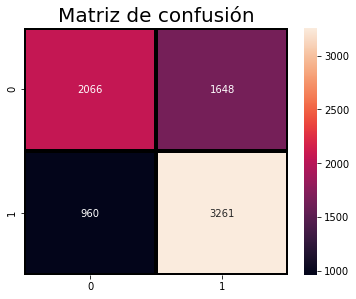

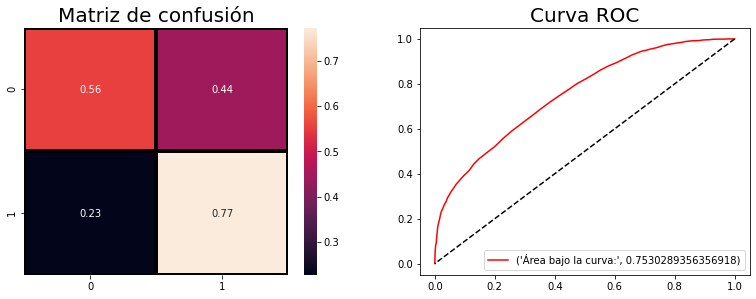

In [ ]:
#Matriz de confusión
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(Y_test, predict),annot=True,fmt="d",linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)
matriss = confusion_matrix(Y_test,predict,normalize='true')
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(matriss,annot=True,linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)
# Curva ROC
predicting_probabilites = KNN.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(Y_test, predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Área bajo la curva:",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.title("Curva ROC",fontsize=20)

In [ ]:
#Seleccion de caracteristicas Discriminante cuadratico

In [ ]:
X_s=X[['game_time','objectives_len','r1_kills','r1_deaths','r1_assists', 'r1_gold','r1_lh','r1_xp' ,'r1_max_health','r1_max_mana','r1_level','r1_stuns','r1_rune_pickups','r1_towers_killed','r2_kills','r2_deaths','r2_assists', 'r2_gold','r2_lh','r2_xp' ,'r2_max_health','r2_max_mana','r2_level','r2_stuns','r2_rune_pickups','r2_towers_killed','r3_kills','r3_deaths','r3_assists', 'r3_gold','r3_lh','r3_xp' ,'r3_max_health','r3_max_mana','r3_level','r3_stuns','r3_rune_pickups','r3_towers_killed','r4_kills','r4_deaths','r4_assists','r4_gold','r4_lh','r4_xp','r4_max_health','r4_max_mana','r4_level','r4_stuns','r4_rune_pickups','r4_towers_killed','r5_kills','r5_deaths','r5_assists', 'r5_gold','r5_lh','r5_xp' ,'r5_max_health','r5_max_mana','r5_level','r5_stuns','r5_rune_pickups','r5_towers_killed','d1_kills','d1_deaths','d1_assists', 'd1_gold','d1_lh','d1_xp' ,'d1_max_health','d1_max_mana','d1_level','d1_stuns','d1_rune_pickups','d1_towers_killed','d2_kills','d2_deaths','d2_assists', 'd2_gold','d2_lh','d2_xp' ,'d2_max_health','d2_max_mana','d2_level','d2_stuns','d2_rune_pickups','d2_towers_killed','d3_kills','d3_deaths','d3_assists', 'd3_gold','d3_lh','d3_xp' ,'d3_max_health','d3_max_mana','d3_level','d3_stuns','d3_rune_pickups','d3_towers_killed','d4_kills','d4_deaths','d4_assists', 'd4_gold','d4_lh','d4_xp' ,'d4_max_health','d4_max_mana','d4_level','d4_stuns','d4_rune_pickups','d4_towers_killed','d5_kills','d5_deaths','d5_assists', 'd5_gold','d5_lh','d5_xp' ,'d5_max_health','d5_max_mana','d5_level','d5_stuns','d5_rune_pickups','d5_towers_killed']]

In [ ]:
for i in X_s.columns:
    X_s[i] = X_s[i].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_important_train,X_important_test,y_important_train, y_important_test = train_test_split(X_s, Y, test_size=0.2, random_state=0)

In [ ]:
dc2 = QuadraticDiscriminantAnalysis()
dc2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_pred_dc2 = dc2.predict(X_test)

# View The Accuracy Of Our Full Feature (All Features) Model
scoreRF_A = accuracy_score(y_test, y_pred_dc2)
scoreRF_A

0.6669187145557656

In [ ]:
dc3 = QuadraticDiscriminantAnalysis()
dc3.fit(X_important_train, y_important_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_pred_dc3 = dc3.predict(X_important_test)

# View The Accuracy Of Our Full Feature (All Features) Model
scoreRF_B = accuracy_score(y_important_test, y_pred_dc3)
scoreRF_B

0.6660365469439193